In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Task 2: Predict the top team in the points table after the completion of the league matches. (Max Points: 05)

In [3]:
df_point  = pd.read_csv('point_table_final.csv',sep='\t', lineterminator='\r')

In [4]:
df_point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 26 columns):
away_points_conceded    69 non-null object
away_points_scored      68 non-null float64
away_wins               68 non-null float64
draws                   68 non-null float64
ga                      0 non-null float64
gf                      0 non-null float64
home_wins               68 non-null float64
is_qualified            68 non-null object
lost                    68 non-null float64
noresult                68 non-null float64
played                  68 non-null float64
points                  68 non-null float64
points_conceded         68 non-null float64
points_scored           68 non-null float64
position                68 non-null float64
position_status         0 non-null float64
prev_position           0 non-null float64
score_diff              68 non-null float64
team_global_id          68 non-null float64
team_id                 68 non-null float64
team_name              

In [5]:
df_point.isnull().sum()/len(df_point)*100

away_points_conceded      0.000000
away_points_scored        1.449275
away_wins                 1.449275
draws                     1.449275
ga                      100.000000
gf                      100.000000
home_wins                 1.449275
is_qualified              1.449275
lost                      1.449275
noresult                  1.449275
played                    1.449275
points                    1.449275
points_conceded           1.449275
points_scored             1.449275
position                  1.449275
position_status         100.000000
prev_position           100.000000
score_diff                1.449275
team_global_id            1.449275
team_id                   1.449275
team_name                 1.449275
team_short_name           1.449275
tied                      1.449275
trump_matches_won         1.449275
wins                      1.449275
season                    1.449275
dtype: float64

Removing columns which has 100% values as NULL

In [6]:
# droping the column team_full_name as it contains all the values as NULL
df_point.drop(['ga','gf','position_status','prev_position',],axis=1,inplace=True)

In [7]:
df_point.isnull().sum()/len(df_point)*100

away_points_conceded    0.000000
away_points_scored      1.449275
away_wins               1.449275
draws                   1.449275
home_wins               1.449275
is_qualified            1.449275
lost                    1.449275
noresult                1.449275
played                  1.449275
points                  1.449275
points_conceded         1.449275
points_scored           1.449275
position                1.449275
score_diff              1.449275
team_global_id          1.449275
team_id                 1.449275
team_name               1.449275
team_short_name         1.449275
tied                    1.449275
trump_matches_won       1.449275
wins                    1.449275
season                  1.449275
dtype: float64

In [8]:
df_point.head()

,away_points_conceded,away_points_scored,away_wins,draws,home_wins,is_qualified,lost,noresult,played,points,points_conceded,points_scored,position,score_diff,team_global_id,team_id,team_name,team_short_name,tied,trump_matches_won,wins,season
0,\n0,0.0,0.0,1.0,0.0,False,3.0,0.0,14.0,54.0,0.0,54.0,1.0,0.0,0.0,3.0,Jaipur Pink Panthers,Jaipur,1.0,0.0,10.0,1.0
1,\n0,0.0,0.0,3.0,0.0,False,3.0,0.0,14.0,51.0,0.0,51.0,2.0,0.0,0.0,5.0,U Mumba,Mumbai,3.0,0.0,8.0,1.0
2,\n0,0.0,0.0,1.0,0.0,False,5.0,0.0,14.0,47.0,0.0,47.0,3.0,0.0,0.0,1.0,Bengaluru Bulls,Bengaluru,1.0,0.0,8.0,1.0
3,\n0,0.0,0.0,2.0,0.0,False,5.0,0.0,14.0,45.0,0.0,45.0,4.0,0.0,0.0,6.0,Patna Pirates,Patna,2.0,0.0,7.0,1.0
4,\n0,0.0,0.0,3.0,0.0,False,5.0,0.0,14.0,42.0,0.0,42.0,5.0,0.0,0.0,8.0,Telugu Titans,Hyderabad,3.0,0.0,6.0,1.0


In [9]:
df_point['away_points_scored'].unique()

array([ 0., nan])

In [10]:
df_point['away_points_scored'].unique()

array([ 0., nan])

In [11]:
df_point['away_wins'].unique()

array([ 0., nan])

In [12]:
df_point['home_wins'].unique()

array([ 0., nan])

In [13]:
df_point['team_global_id'].unique()

array([ 0., nan])

In [14]:
df_point['trump_matches_won'].unique()

array([ 0., nan])

In [15]:
#Droping above columns as they have all the values as zero
df_point.drop(['away_points_conceded','away_points_scored','away_wins','home_wins','team_global_id','trump_matches_won'],
             axis=1,inplace=True)

In [16]:
df_point.isnull().sum()/len(df_point)*100

draws              1.449275
is_qualified       1.449275
lost               1.449275
noresult           1.449275
played             1.449275
points             1.449275
points_conceded    1.449275
points_scored      1.449275
position           1.449275
score_diff         1.449275
team_id            1.449275
team_name          1.449275
team_short_name    1.449275
tied               1.449275
wins               1.449275
season             1.449275
dtype: float64

In [17]:
df_point.loc[df_point['draws'].isnull()]

,draws,is_qualified,lost,noresult,played,points,points_conceded,points_scored,position,score_diff,team_id,team_name,team_short_name,tied,wins,season
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Lets remove this row as all the values are NULL
df_point = df_point.loc[~df_point['draws'].isnull()]

In [19]:
df_point.isnull().sum()/len(df_point)*100

draws              0.0
is_qualified       0.0
lost               0.0
noresult           0.0
played             0.0
points             0.0
points_conceded    0.0
points_scored      0.0
position           0.0
score_diff         0.0
team_id            0.0
team_name          0.0
team_short_name    0.0
tied               0.0
wins               0.0
season             0.0
dtype: float64

In [20]:
df_point.head()

,draws,is_qualified,lost,noresult,played,points,points_conceded,points_scored,position,score_diff,team_id,team_name,team_short_name,tied,wins,season
0,1.0,False,3.0,0.0,14.0,54.0,0.0,54.0,1.0,0.0,3.0,Jaipur Pink Panthers,Jaipur,1.0,10.0,1.0
1,3.0,False,3.0,0.0,14.0,51.0,0.0,51.0,2.0,0.0,5.0,U Mumba,Mumbai,3.0,8.0,1.0
2,1.0,False,5.0,0.0,14.0,47.0,0.0,47.0,3.0,0.0,1.0,Bengaluru Bulls,Bengaluru,1.0,8.0,1.0
3,2.0,False,5.0,0.0,14.0,45.0,0.0,45.0,4.0,0.0,6.0,Patna Pirates,Patna,2.0,7.0,1.0
4,3.0,False,5.0,0.0,14.0,42.0,0.0,42.0,5.0,0.0,8.0,Telugu Titans,Hyderabad,3.0,6.0,1.0


In [21]:
#Lets convert is_qualified column as 1 for True or 0 for False
def is_qualified(var):
    if var:
        return 1
    else:
        return 0

In [22]:
df_point['is_qualified'] = df_point['is_qualified'].apply(lambda x:is_qualified(x))

In [23]:
df_point.head()

,draws,is_qualified,lost,noresult,played,points,points_conceded,points_scored,position,score_diff,team_id,team_name,team_short_name,tied,wins,season
0,1.0,0,3.0,0.0,14.0,54.0,0.0,54.0,1.0,0.0,3.0,Jaipur Pink Panthers,Jaipur,1.0,10.0,1.0
1,3.0,0,3.0,0.0,14.0,51.0,0.0,51.0,2.0,0.0,5.0,U Mumba,Mumbai,3.0,8.0,1.0
2,1.0,0,5.0,0.0,14.0,47.0,0.0,47.0,3.0,0.0,1.0,Bengaluru Bulls,Bengaluru,1.0,8.0,1.0
3,2.0,0,5.0,0.0,14.0,45.0,0.0,45.0,4.0,0.0,6.0,Patna Pirates,Patna,2.0,7.0,1.0
4,3.0,0,5.0,0.0,14.0,42.0,0.0,42.0,5.0,0.0,8.0,Telugu Titans,Hyderabad,3.0,6.0,1.0


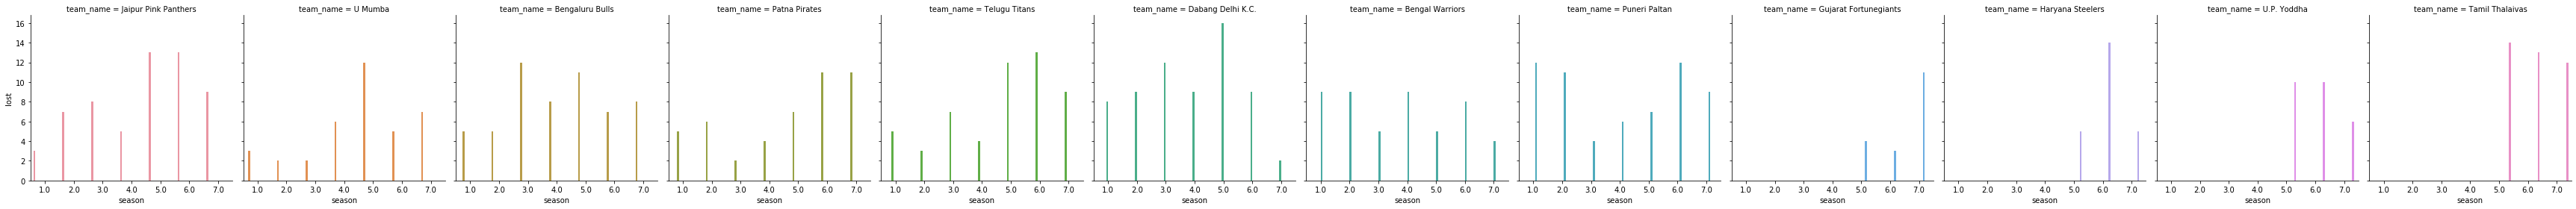

In [24]:
ax=sns.catplot(data=df_point,x='season',y='lost',hue='team_name',kind="bar",col="team_name", height=4, aspect=1.0)

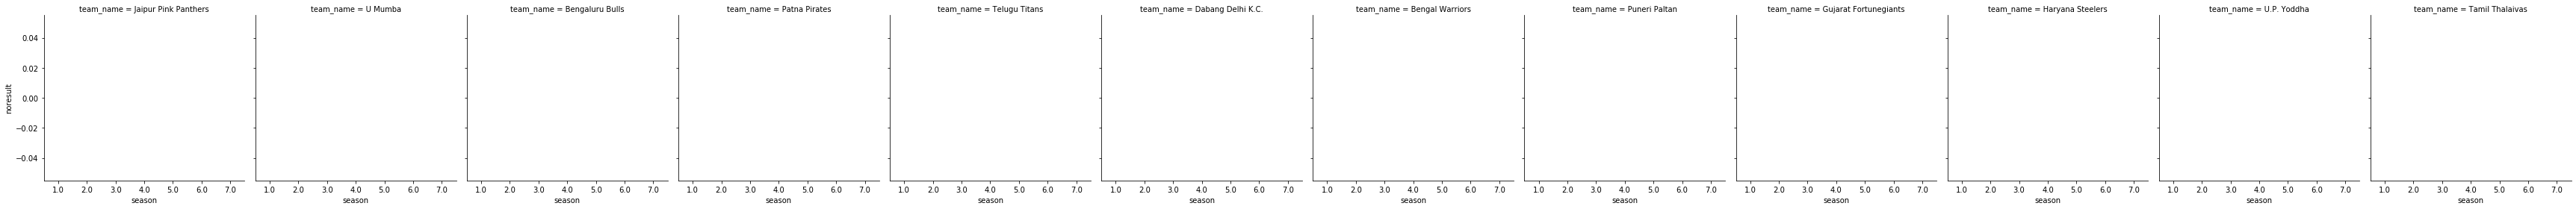

In [25]:
ax=sns.catplot(data=df_point,x='season',y='noresult',hue='team_name',kind="bar",col="team_name", height=4, aspect=1.0)

In [26]:
df_point['noresult'].unique()

array([0.])

In [27]:
df_point.drop('noresult',axis=1,inplace=True)

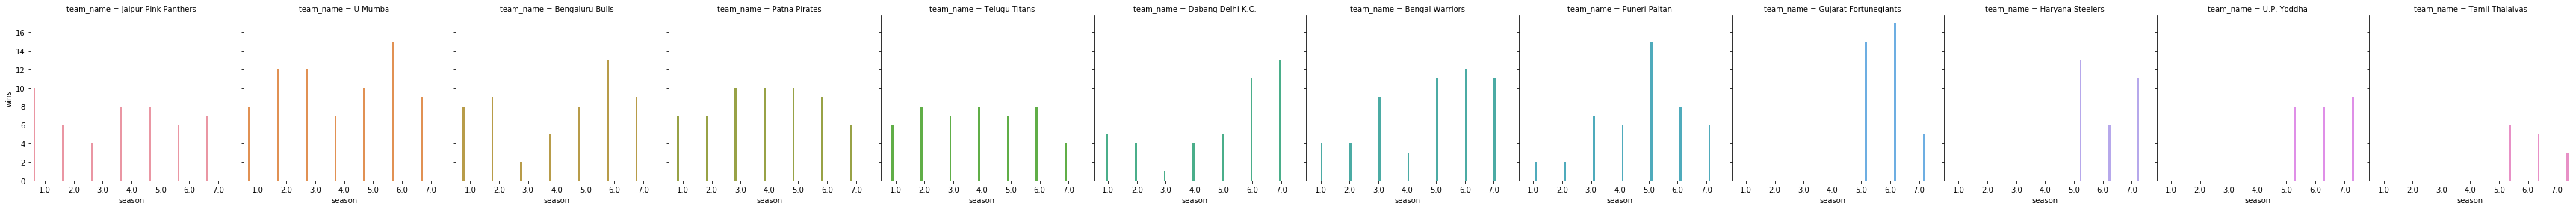

In [28]:
ax=sns.catplot(data=df_point,x='season',y='wins',hue='team_name',kind="bar",col="team_name", height=4, aspect=1.0)

In [29]:
#Lets Remove the team_short_name and Team_id column
df_point.drop(['team_id','team_short_name'],axis=1,inplace=True)

In [30]:
df_point['season'].unique()

array([1., 2., 3., 4., 5., 6., 7.])

In [31]:
#Seperating the point table for season for 7 for prediction and season 1 to season 6 for training
df_train = df_point.loc[df_point['season']!=7]
df_test = df_point.loc[df_point['season']==7]

In [32]:
df_train.head()

,draws,is_qualified,lost,played,points,points_conceded,points_scored,position,score_diff,team_name,tied,wins,season
0,1.0,0,3.0,14.0,54.0,0.0,54.0,1.0,0.0,Jaipur Pink Panthers,1.0,10.0,1.0
1,3.0,0,3.0,14.0,51.0,0.0,51.0,2.0,0.0,U Mumba,3.0,8.0,1.0
2,1.0,0,5.0,14.0,47.0,0.0,47.0,3.0,0.0,Bengaluru Bulls,1.0,8.0,1.0
3,2.0,0,5.0,14.0,45.0,0.0,45.0,4.0,0.0,Patna Pirates,2.0,7.0,1.0
4,3.0,0,5.0,14.0,42.0,0.0,42.0,5.0,0.0,Telugu Titans,3.0,6.0,1.0


In [33]:
df_test.head()

,draws,is_qualified,lost,played,points,points_conceded,points_scored,position,score_diff,team_name,tied,wins,season
56,2.0,1,2.0,17.0,72.0,68.0,72.0,1.0,68.0,Dabang Delhi K.C.,2.0,13.0,7.0
57,3.0,1,4.0,18.0,68.0,85.0,68.0,2.0,85.0,Bengal Warriors,3.0,11.0,7.0
58,1.0,0,5.0,17.0,59.0,30.0,59.0,3.0,30.0,Haryana Steelers,1.0,11.0,7.0
59,1.0,0,7.0,17.0,53.0,35.0,53.0,4.0,35.0,U Mumba,1.0,9.0,7.0
60,1.0,0,8.0,18.0,53.0,10.0,53.0,5.0,10.0,Bengaluru Bulls,1.0,9.0,7.0


In [34]:
df_train.drop('season',axis=1,inplace=True)
df_test.drop('season',axis=1,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [35]:
from sklearn import model_selection
from sklearn import metrics

In [36]:
def modelfit(alg, dtrain, dtest, predictors, target,IDcol):
    #, IDcol, filename
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y_train)
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(y_train) , cv=50, 
                                                scoring='neg_mean_squared_error',n_jobs=-1,verbose=-1)
    cv_score = np.sqrt(np.abs(cv_score))
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train.values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                             np.min(cv_score),np.max(cv_score)))
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    #Export submission file:
    IDcol.append(target)
    #submission = pd.DataFrame({ x: y_test[x] for x in IDcol})
    return dtest[['team_name','position','position_pred']]

In [37]:
IDcol = ['team_name']
target = 'position_pred'
predictors = list(df_train.columns)
predictors.remove('position')
predictors.remove('team_name')

In [38]:
y_train=df_train['position']
y_test=df_test[IDcol]
x_train=df_train[predictors]

In [39]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
prediction=modelfit(LR,df_train,df_test,predictors,target,IDcol)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Model Report
RMSE : 0.7375
CV Score : Mean - 0.6811 | Std - 0.53 | Min - 0.01228 | Max - 2.248


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.5s finished
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


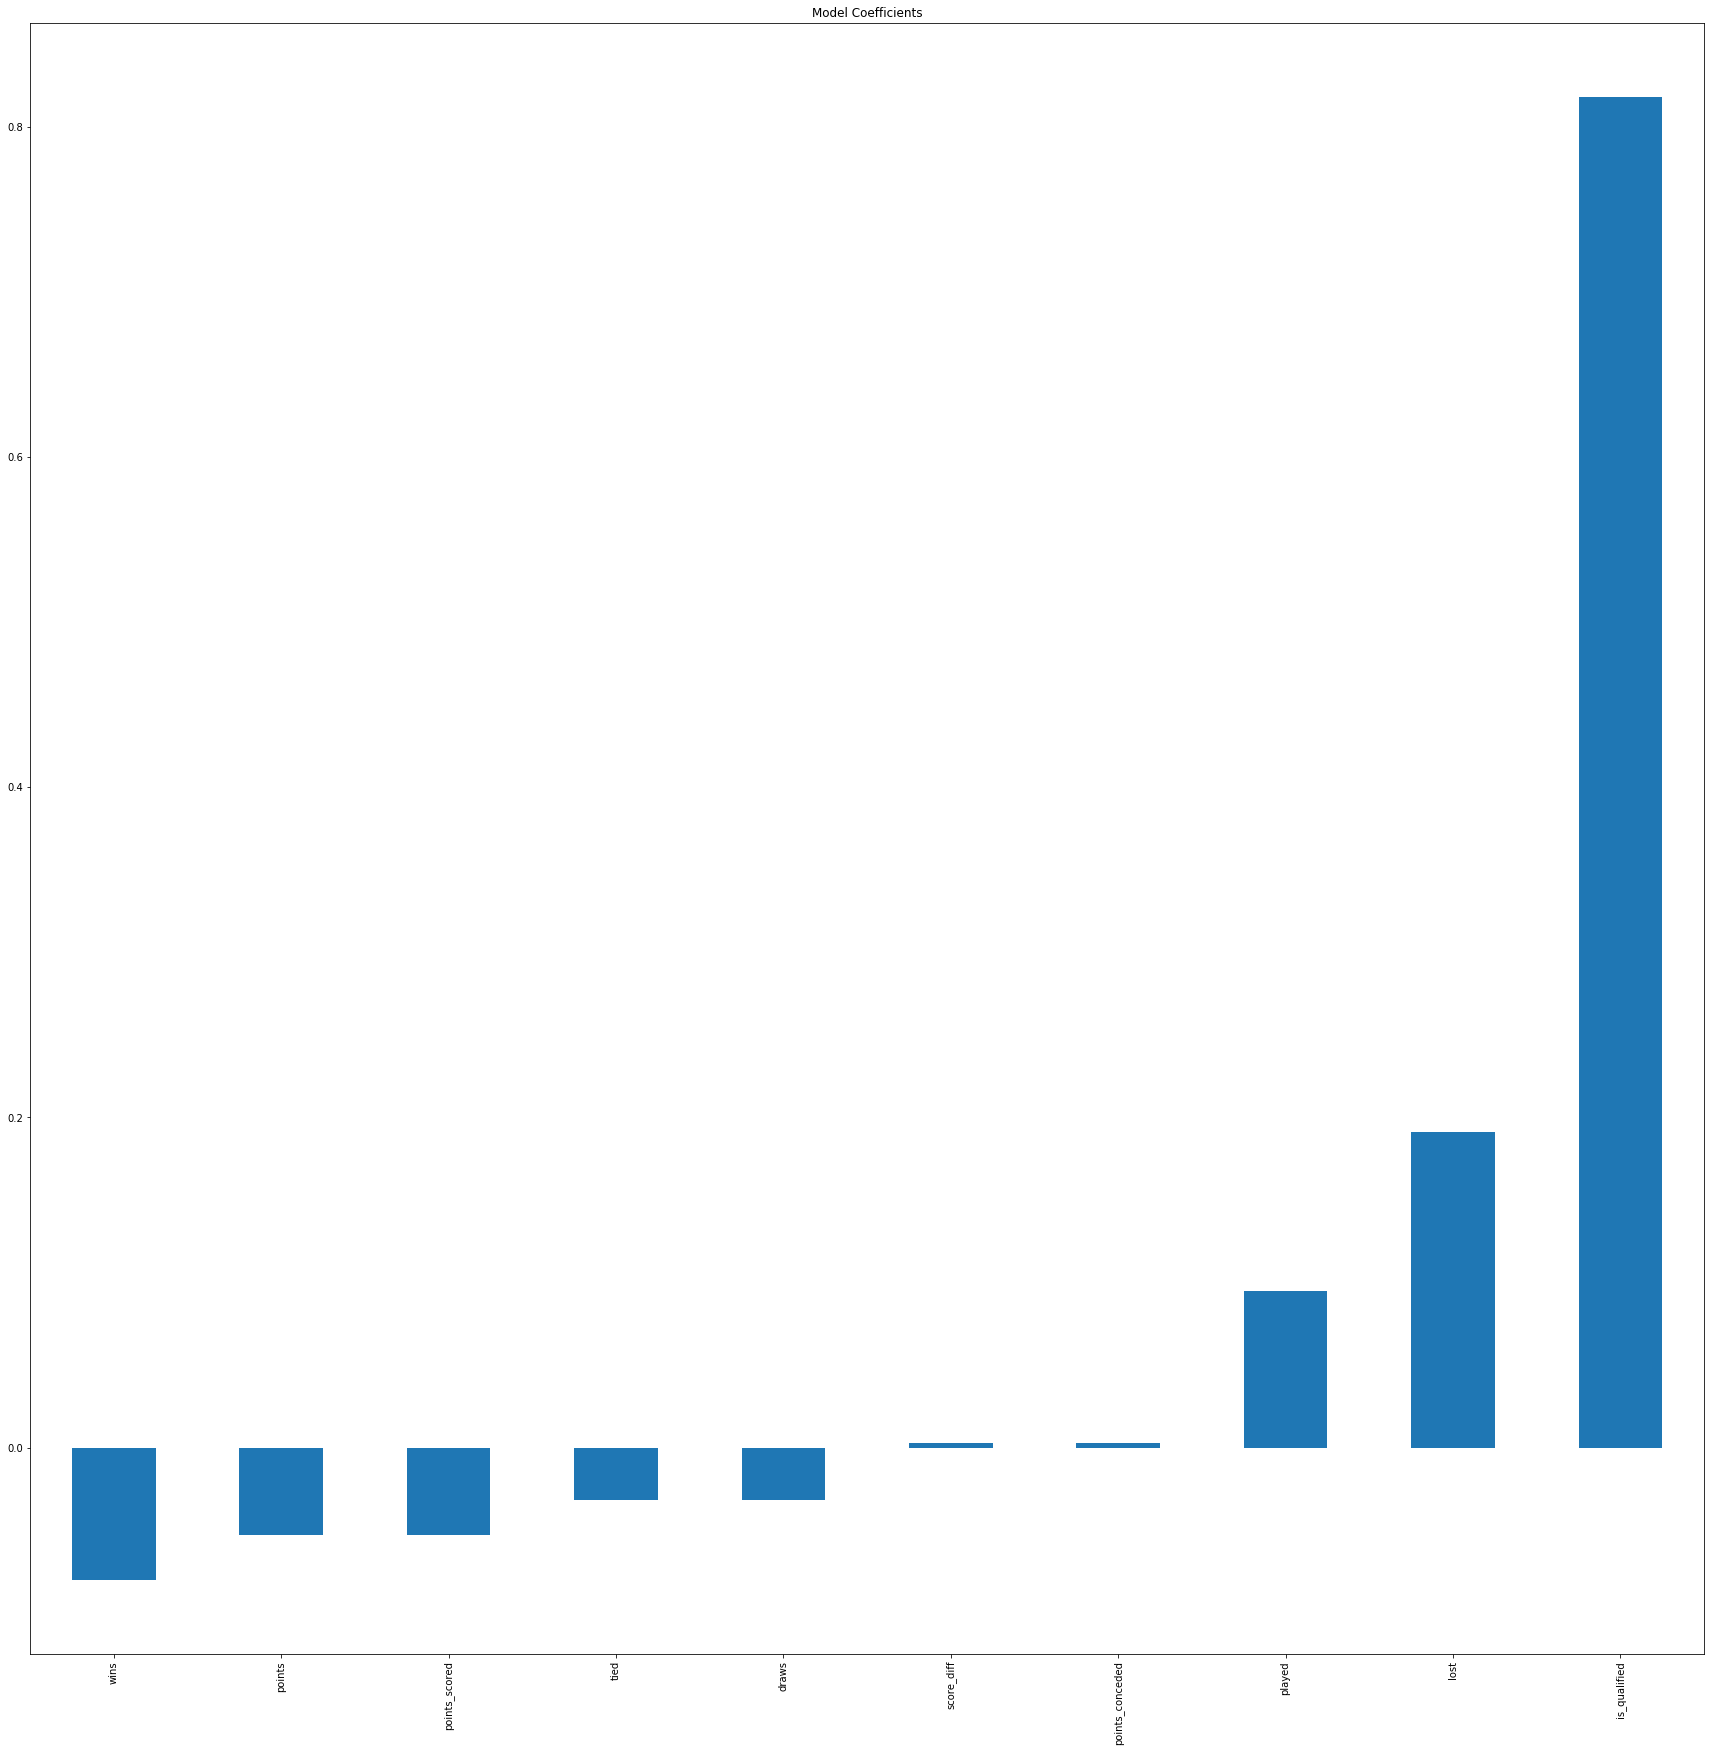

In [40]:
f, ax = plt.subplots(figsize=(30, 30))
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [41]:
prediction.sort_values(by='position_pred').head(3)

,team_name,position,position_pred
56,Dabang Delhi K.C.,1.0,1.061595
57,Bengal Warriors,2.0,2.157950
58,Haryana Steelers,3.0,2.205216


In [42]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.020,normalize=True)
prediction=modelfit(RR,df_train,df_test,predictors,target,IDcol)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished



Model Report
RMSE : 0.7401
CV Score : Mean - 0.6748 | Std - 0.5209 | Min - 0.02147 | Max - 2.208


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


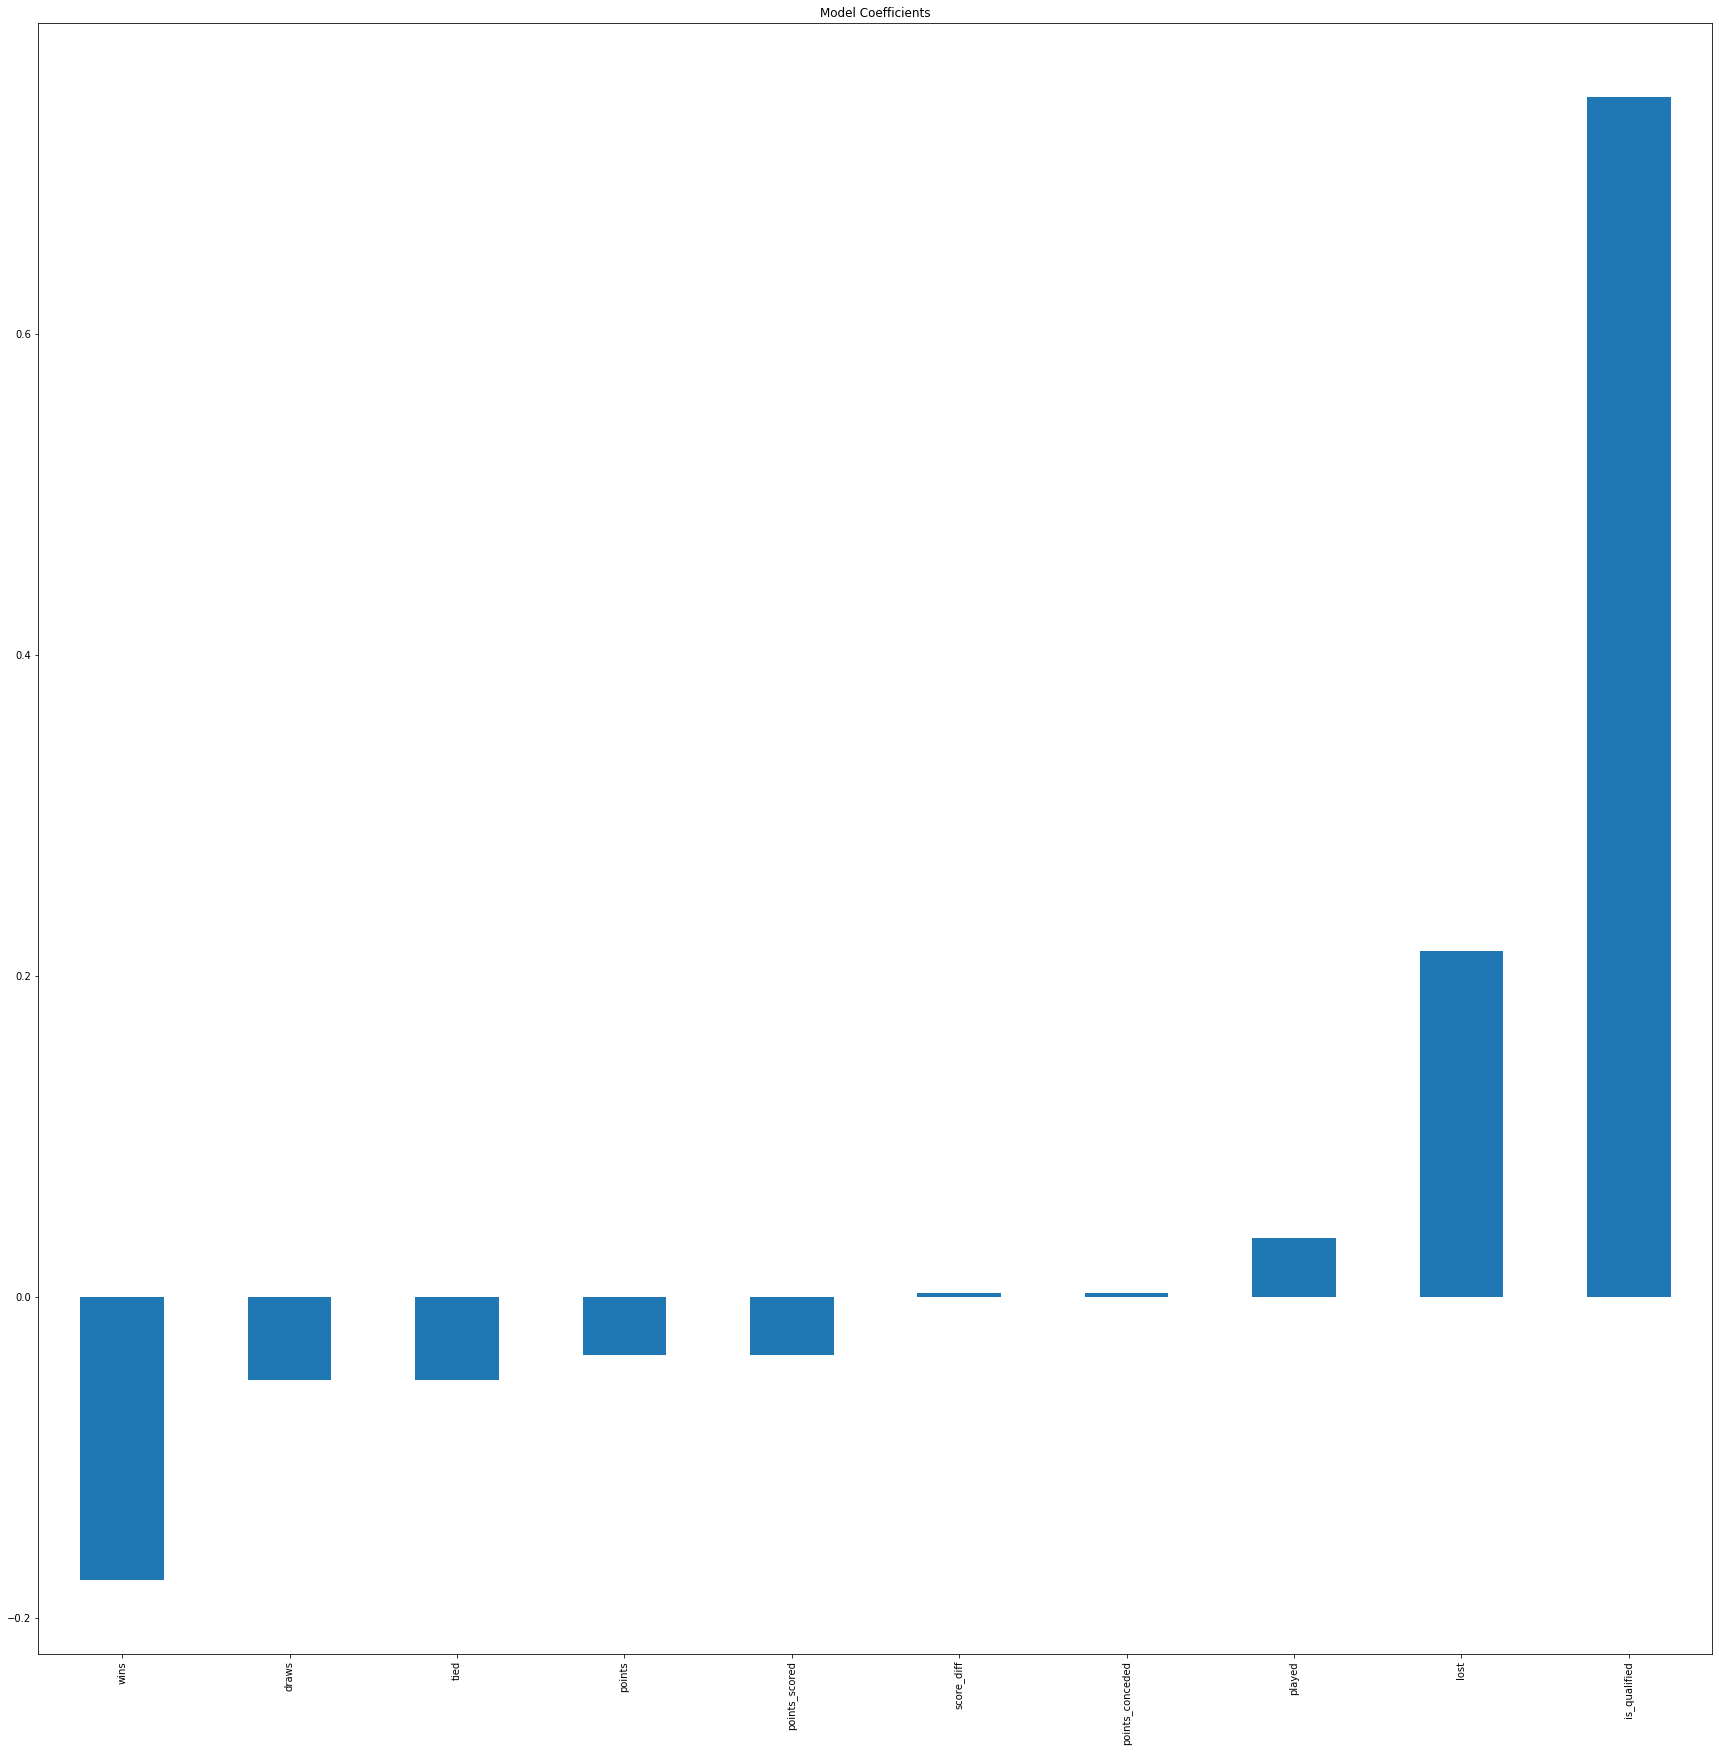

In [43]:
f, ax = plt.subplots(figsize=(30, 30))
coef1 = pd.Series(RR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [44]:
prediction.sort_values(by='position_pred').head(3)

,team_name,position,position_pred
56,Dabang Delhi K.C.,1.0,1.071715
57,Bengal Warriors,2.0,2.151840
58,Haryana Steelers,3.0,2.202503


In [45]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1500, learning_rate=0.2,nthread=-1)
prediction=modelfit(my_model, df_train, df_test, predictors, target,IDcol)

D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[10:43:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Model Report
RMSE : 0.002249
CV Score : Mean - 0.6329 | Std - 0.4284 | Min - 0.01035 | Max - 1.792


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   21.3s finished
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


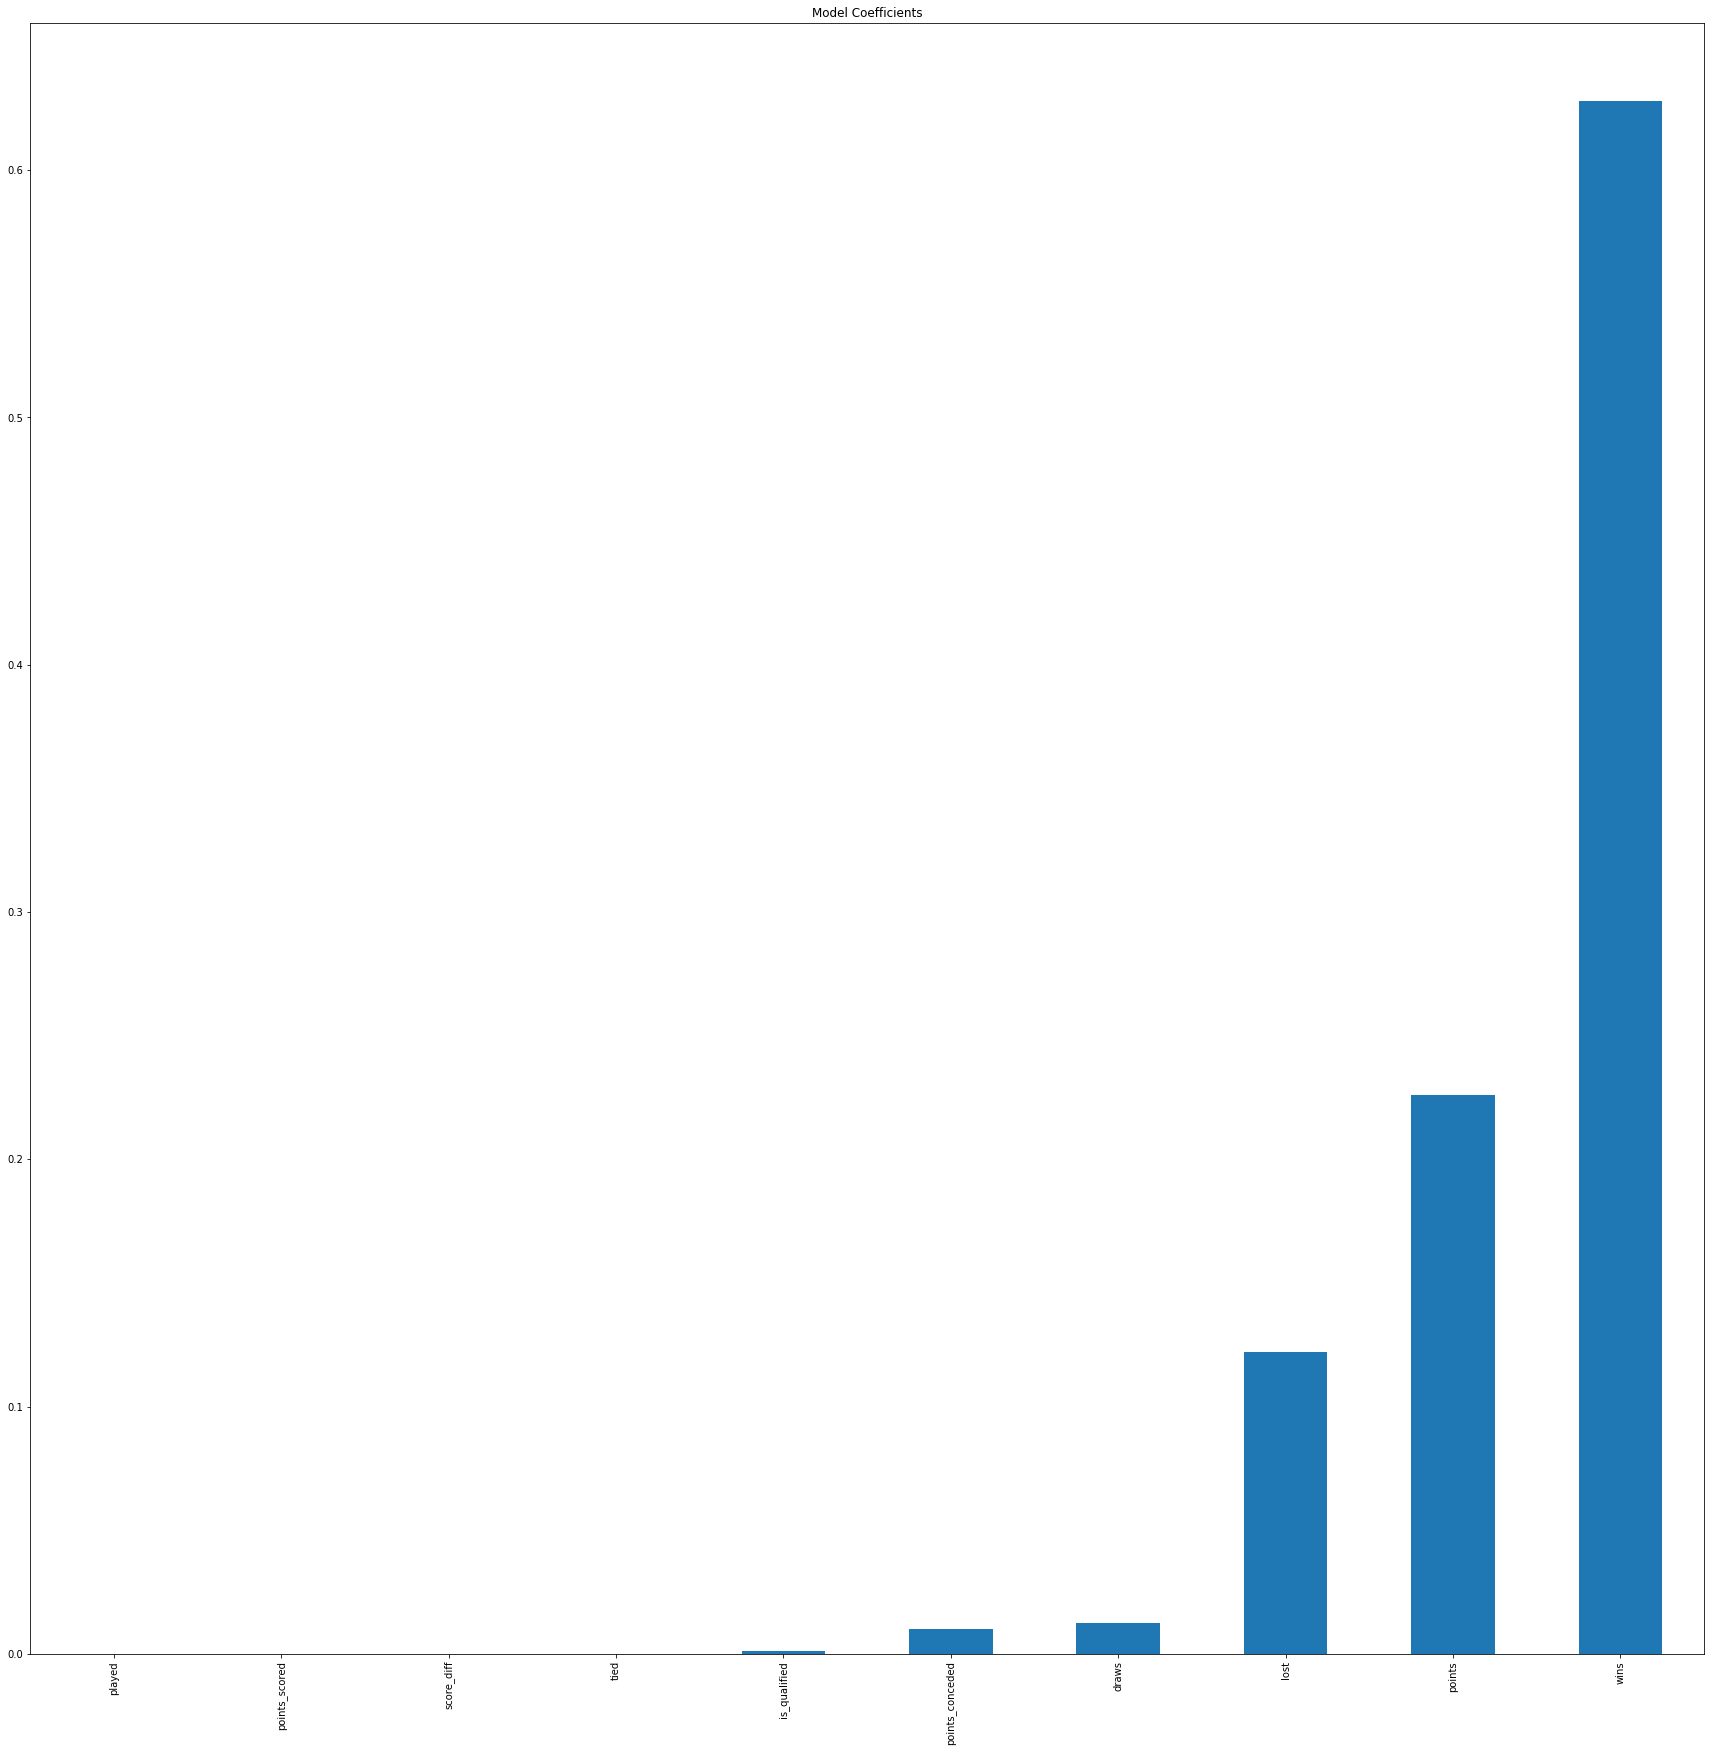

In [46]:
f, ax = plt.subplots(figsize=(30, 30))
coef1 = pd.Series(my_model.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [47]:
prediction.sort_values(by='position_pred').head(3)

,team_name,position,position_pred
57,Bengal Warriors,2.0,1.235338
56,Dabang Delhi K.C.,1.0,1.725705
58,Haryana Steelers,3.0,2.767828
